2024-11-18 14:10:32,280 - INFO - Reading data from file
2024-11-18 14:10:32,537 - INFO - Dropping 'ID' column
2024-11-18 14:10:32,554 - INFO - Standardizing data
2024-11-18 14:10:32,605 - INFO - Initializing t-SNE
2024-11-18 14:10:32,606 - INFO - Running t-SNE
2024-11-18 14:13:17,831 - INFO - Converting t-SNE result to DataFrame
2024-11-18 14:13:17,833 - INFO - Plotting t-SNE visualization


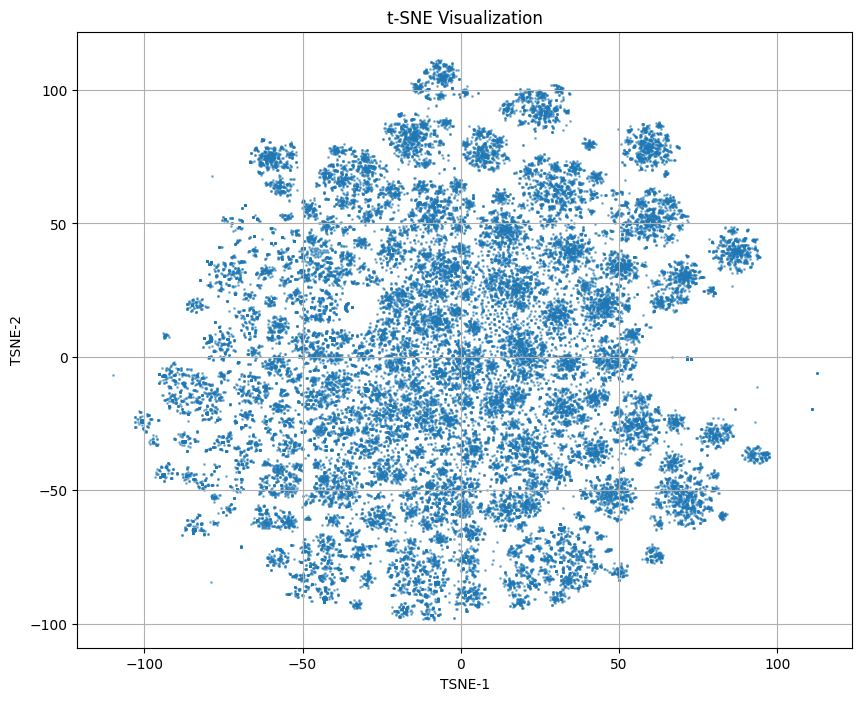

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import logging
from tqdm import tqdm

# 設定 logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 1. 資料讀取
logging.info("Reading data from file")
file_path = 'diet_data_cleaned.csv'
data = pd.read_csv(file_path)

# 假設 'ID' 欄位是識別符號，將其移除，不參與分析
if 'ID' in data.columns:
    logging.info("Dropping 'ID' column")
    data = data.drop('ID', axis=1)

# 如果資料中有其他非數值型欄位，需進行處理（如移除或轉換）
# 這裡假設所有特徵已是數值型資料

# 2. 資料標準化
logging.info("Standardizing data")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)  # 將數據標準化為零均值、單位方差

# 3. 初始化 t-SNE
logging.info("Initializing t-SNE")
tsne = TSNE(n_components=2, random_state=42)

# 4. 執行 t-SNE
logging.info("Running t-SNE")
X_tsne = tsne.fit_transform(X_scaled)

# 5. 將降維結果轉為 DataFrame
logging.info("Converting t-SNE result to DataFrame")
X_tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2'])

# 6. 繪製 t-SNE 的 2D 可視化
logging.info("Plotting t-SNE visualization")
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne_df['TSNE-1'], X_tsne_df['TSNE-2'], alpha=0.5, s=1)
plt.title("t-SNE Visualization")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.grid(True)
plt.show()


2024-11-18 13:37:15,834 - INFO - Running KMeans with k=2
2024-11-18 13:38:35,354 - INFO - k=2, SSE=156823920.0, Silhouette Score=0.3445974588394165
2024-11-18 13:38:35,355 - INFO - Running KMeans with k=3
2024-11-18 13:39:53,021 - INFO - k=3, SSE=103756176.0, Silhouette Score=0.35955125093460083
2024-11-18 13:39:53,023 - INFO - Running KMeans with k=4
2024-11-18 13:41:07,667 - INFO - k=4, SSE=72675920.0, Silhouette Score=0.36254239082336426
2024-11-18 13:41:07,668 - INFO - Running KMeans with k=5
2024-11-18 13:42:22,675 - INFO - k=5, SSE=62413360.0, Silhouette Score=0.34826192259788513
2024-11-18 13:42:22,677 - INFO - Running KMeans with k=6
2024-11-18 13:43:14,065 - INFO - k=6, SSE=49513156.0, Silhouette Score=0.3633957803249359
2024-11-18 13:43:14,066 - INFO - Running KMeans with k=7
2024-11-18 13:43:53,714 - INFO - k=7, SSE=40615544.0, Silhouette Score=0.36569640040397644
2024-11-18 13:43:53,715 - INFO - Running KMeans with k=8
2024-11-18 13:44:34,857 - INFO - k=8, SSE=35577016.0, S

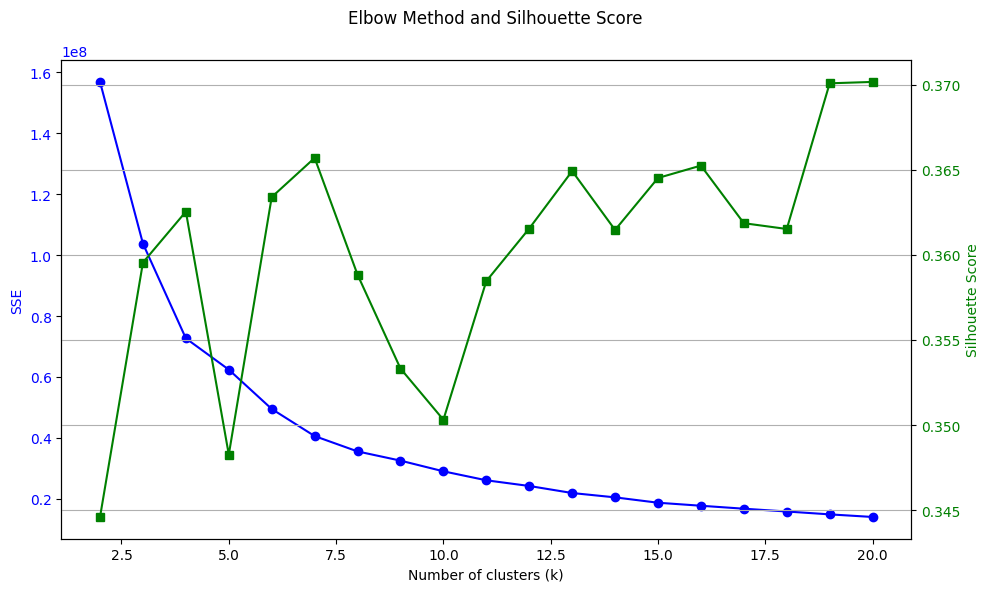

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import logging

# 設定 logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 設定 K 的範圍
k_values = range(2, 11)
sse = []
silhouette_scores = []

# 計算 SSE 和輪廓係數
for k in k_values:
    logging.info(f"Running KMeans with k={k}")
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_tsne_df)
    sse.append(kmeans.inertia_)
    score = silhouette_score(X_tsne_df, labels)
    silhouette_scores.append(score)
    logging.info(f"k={k}, SSE={kmeans.inertia_}, Silhouette Score={score}")

# 繪製肘部法則和輪廓係數
logging.info("Plotting Elbow Method and Silhouette Score")
fig, ax1 = plt.subplots(figsize=(10, 6))

# 肘部法則
ax1.plot(k_values, sse, marker='o', color='blue', label='SSE')
ax1.set_xlabel("Number of clusters (k)")
ax1.set_ylabel("SSE", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 輪廓係數
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores, marker='s', color='green', label='Silhouette Score')
ax2.set_ylabel("Silhouette Score", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 添加標題與圖例
fig.suptitle("Elbow Method and Silhouette Score")
fig.tight_layout()
plt.grid(True)
plt.show()

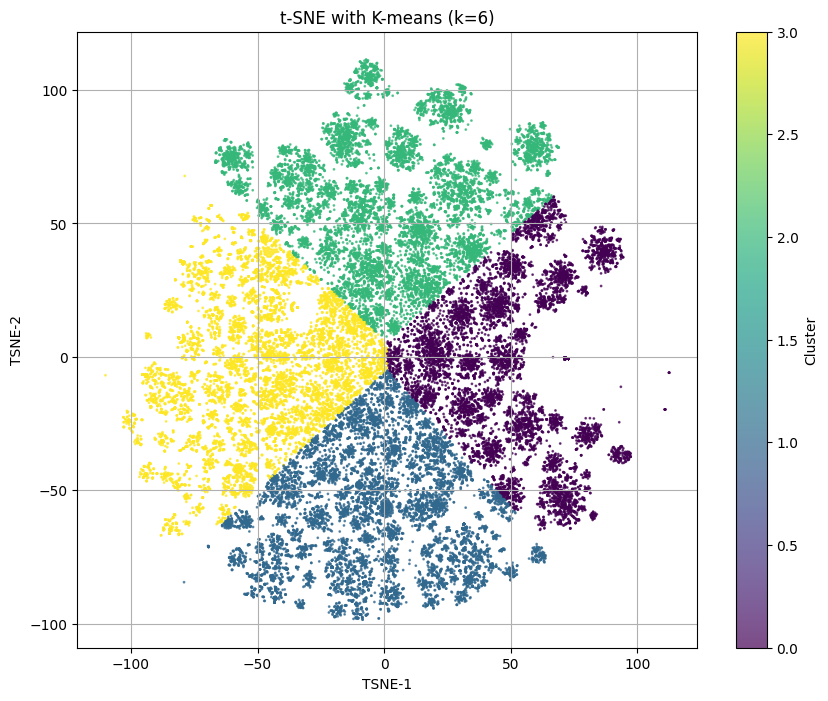

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_tsne_df)

# 繪製分群結果
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne_df['TSNE-1'], X_tsne_df['TSNE-2'], c=labels, cmap='viridis', alpha=0.7, s=1)
plt.title("t-SNE with K-means (k=4)")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.grid(True)
plt.colorbar(label="Cluster")
plt.show()

2024-11-18 14:18:58,460 - INFO - Reading data from file
2024-11-18 14:18:58,655 - INFO - Dropping 'ID' column
2024-11-18 14:18:58,665 - INFO - Standardizing data
2024-11-18 14:18:58,712 - INFO - Initializing openTSNE
2024-11-18 14:18:58,713 - INFO - Running openTSNE
2024-11-18 14:19:09,207 - INFO - Precomputed initialization provided. Ignoring initalization-related parameters.
2024-11-18 14:19:09,227 - INFO - Automatically determined negative gradient method `fft`
2024-11-18 14:19:19,236 - INFO - Automatically determined negative gradient method `fft`
2024-11-18 14:20:22,234 - INFO - Converting t-SNE result to DataFrame
2024-11-18 14:20:22,236 - INFO - Plotting t-SNE visualization


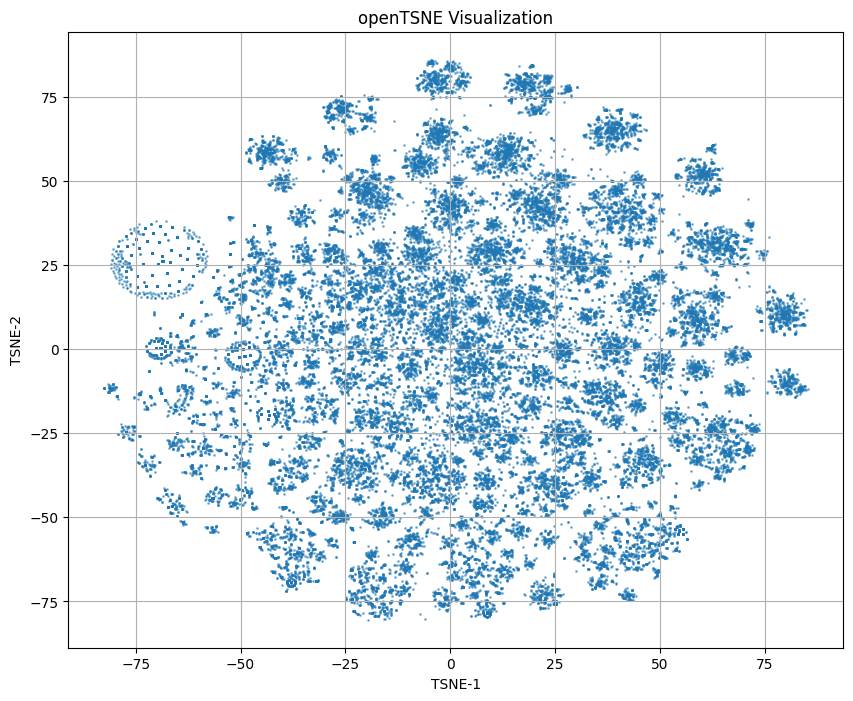

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from openTSNE import TSNE
import logging

# 設定 logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 1. 資料讀取
logging.info("Reading data from file")
file_path = 'diet_data_cleaned.csv'
data = pd.read_csv(file_path)

# 假設 'ID' 欄位是識別符號，將其移除，不參與分析
if 'ID' in data.columns:
    logging.info("Dropping 'ID' column")
    data = data.drop('ID', axis=1)

# 如果資料中有其他非數值型欄位，需進行處理（如移除或轉換）
# 這裡假設所有特徵已是數值型資料

# 2. 資料標準化
logging.info("Standardizing data")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)  # 將數據標準化為零均值、單位方差

# 3. 初始化 openTSNE
logging.info("Initializing openTSNE")
tsne = TSNE(
    n_components=2,  # 降至 2 維
    n_jobs=-1,       # 使用所有可用 CPU 核心
    random_state=42  # 確保結果可重現
)

# 4. 執行 t-SNE
logging.info("Running openTSNE")
X_tsne = tsne.fit(X_scaled)

# 5. 將降維結果轉為 DataFrame
logging.info("Converting t-SNE result to DataFrame")
X_tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2'])

# 6. 繪製 t-SNE 的 2D 可視化
logging.info("Plotting t-SNE visualization")
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne_df['TSNE-1'], X_tsne_df['TSNE-2'], alpha=0.5, s=1)
plt.title("openTSNE Visualization")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.grid(True)
plt.show()


2024-11-18 14:00:06,161 - INFO - Running KMeans with k=2


2024-11-18 14:00:48,496 - INFO - k=2, SSE=99185140.22418992, Silhouette Score=0.33653968722028016
2024-11-18 14:00:48,498 - INFO - Running KMeans with k=3
2024-11-18 14:01:31,659 - INFO - k=3, SSE=60519246.79699088, Silhouette Score=0.37778264772308207
2024-11-18 14:01:31,660 - INFO - Running KMeans with k=4
2024-11-18 14:02:07,719 - INFO - k=4, SSE=43932262.87840613, Silhouette Score=0.37035006752063804
2024-11-18 14:02:07,720 - INFO - Running KMeans with k=5
2024-11-18 14:02:42,510 - INFO - k=5, SSE=36451168.27087942, Silhouette Score=0.34256602528699753
2024-11-18 14:02:42,510 - INFO - Running KMeans with k=6
2024-11-18 14:03:18,454 - INFO - k=6, SSE=29462281.084142793, Silhouette Score=0.3698682909352116
2024-11-18 14:03:18,455 - INFO - Running KMeans with k=7
2024-11-18 14:03:54,175 - INFO - k=7, SSE=26907414.511677712, Silhouette Score=0.3403058653797661
2024-11-18 14:03:54,176 - INFO - Running KMeans with k=8
2024-11-18 14:04:28,200 - INFO - k=8, SSE=22241007.753407028, Silhouet

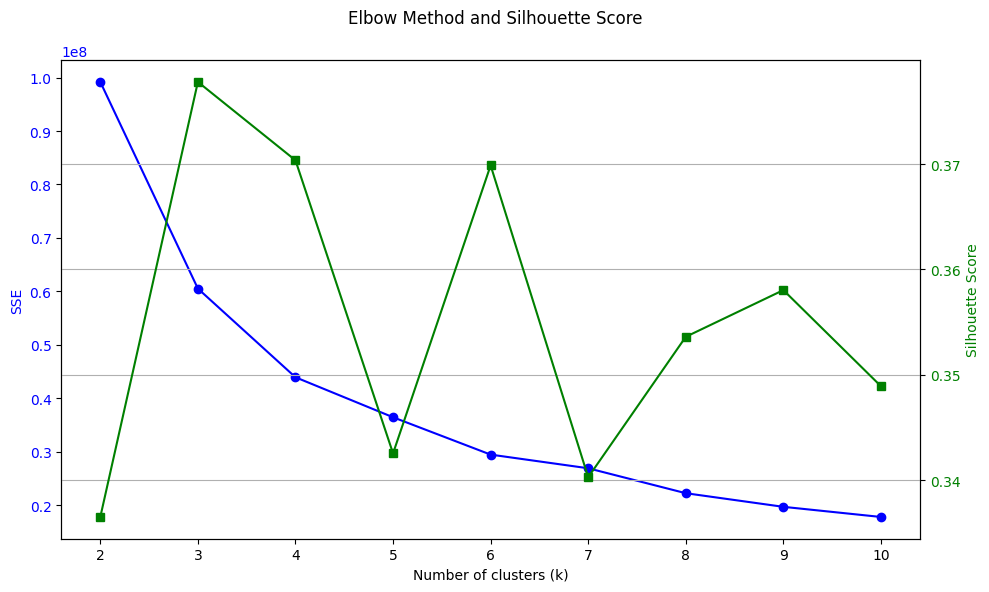

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import logging

# 設定 logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 設定 K 的範圍
k_values = range(2, 11)
sse = []
silhouette_scores = []

# 計算 SSE 和輪廓係數
for k in k_values:
    logging.info(f"Running KMeans with k={k}")
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_tsne_df)
    sse.append(kmeans.inertia_)
    score = silhouette_score(X_tsne_df, labels)
    silhouette_scores.append(score)
    logging.info(f"k={k}, SSE={kmeans.inertia_}, Silhouette Score={score}")

# 繪製肘部法則和輪廓係數
logging.info("Plotting Elbow Method and Silhouette Score")
fig, ax1 = plt.subplots(figsize=(10, 6))

# 肘部法則
ax1.plot(k_values, sse, marker='o', color='blue', label='SSE')
ax1.set_xlabel("Number of clusters (k)")
ax1.set_ylabel("SSE", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 輪廓係數
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores, marker='s', color='green', label='Silhouette Score')
ax2.set_ylabel("Silhouette Score", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 添加標題與圖例
fig.suptitle("Elbow Method and Silhouette Score")
fig.tight_layout()
plt.grid(True)
plt.show()


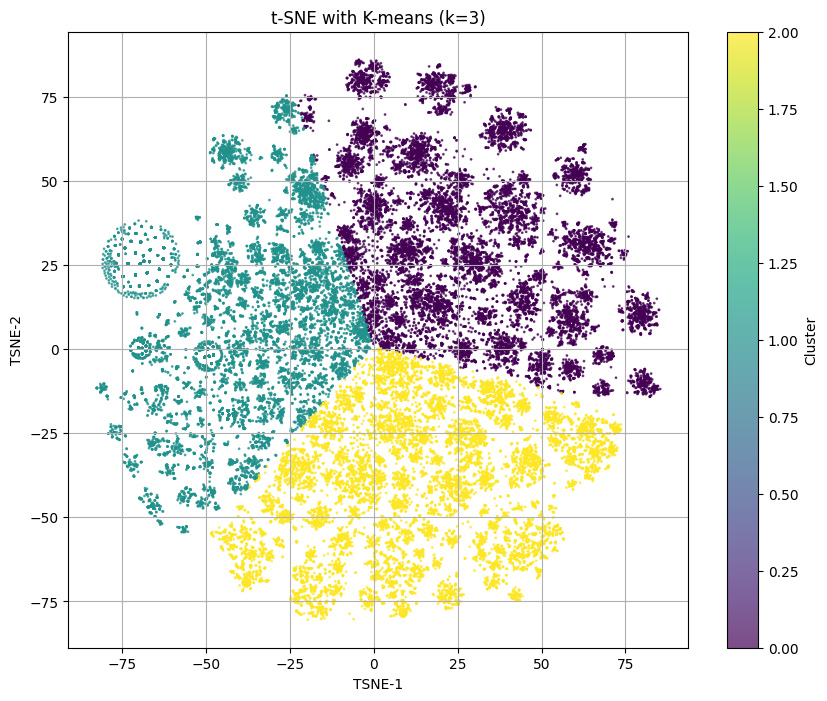

In [34]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_tsne_df)

# 繪製分群結果
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne_df['TSNE-1'], X_tsne_df['TSNE-2'], c=labels, cmap='viridis', alpha=0.7, s=1)
plt.title("t-SNE with K-means (k=3)")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.grid(True)
plt.colorbar(label="Cluster")
plt.show()